In [1]:
import os
import numpy as np
from astropy import units as u 
from astropy import coordinates
from astropy.io import fits
import matplotlib.pyplot as plt
import aplpy

%matplotlib inline

In [31]:
imagename = '../compareImage/images/J0423-0120_B3.fits'

In [32]:
hdu_list = fits.open(imagename)

In [33]:
hdu_list.info()

Filename: ../compareImage/images/J0423-0120_B3.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU    1222   (768, 768, 1, 1)   float32   


In [35]:
image_data = hdu_list[0].data

In [34]:
print type(image_data)
print image_data.shape

<type 'numpy.ndarray'>
(1, 1, 768, 768)


In [7]:
image_data[0][0].shape

(768, 768)

In [8]:
img = image_data[0][0]

In [9]:
type(img)

numpy.ndarray

INFO: Setting slices=[0, 0] [aplpy.core]


indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in param

INFO: Auto-setting vmin to -9.849e-05 [aplpy.core]
INFO: Auto-setting vmax to  1.187e-04 [aplpy.core]


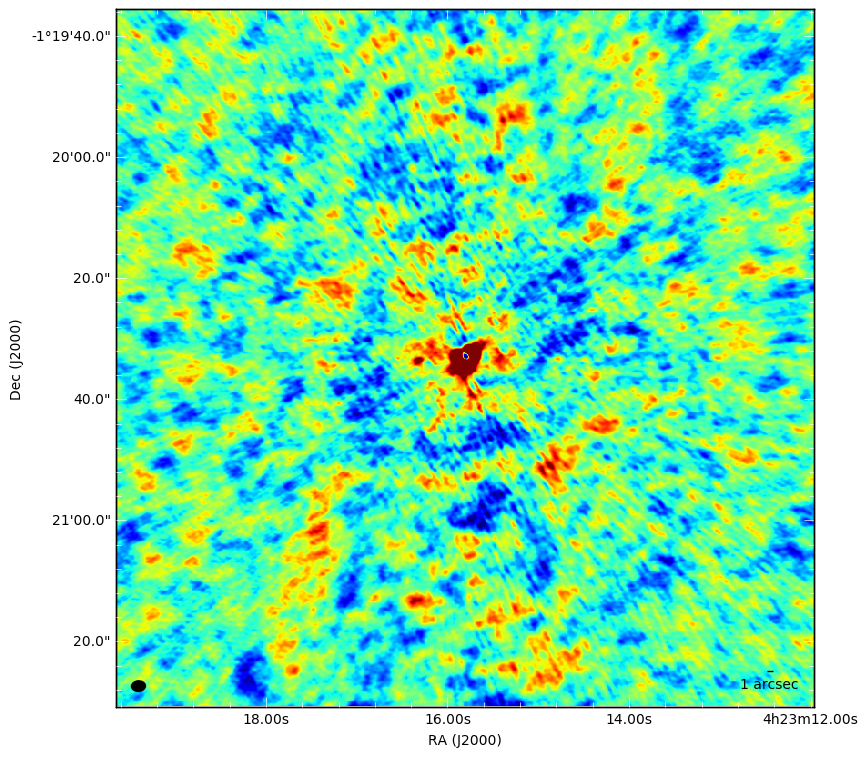

In [10]:
fig = aplpy.FITSFigure(imagename)
fig.add_beam()
fig.beam.set_color('black')
fig.add_scalebar(1 * u.arcsecond)
fig.scalebar.set_label('1 arcsec')
fig.scalebar.set_color("black")
fig.show_colorscale()

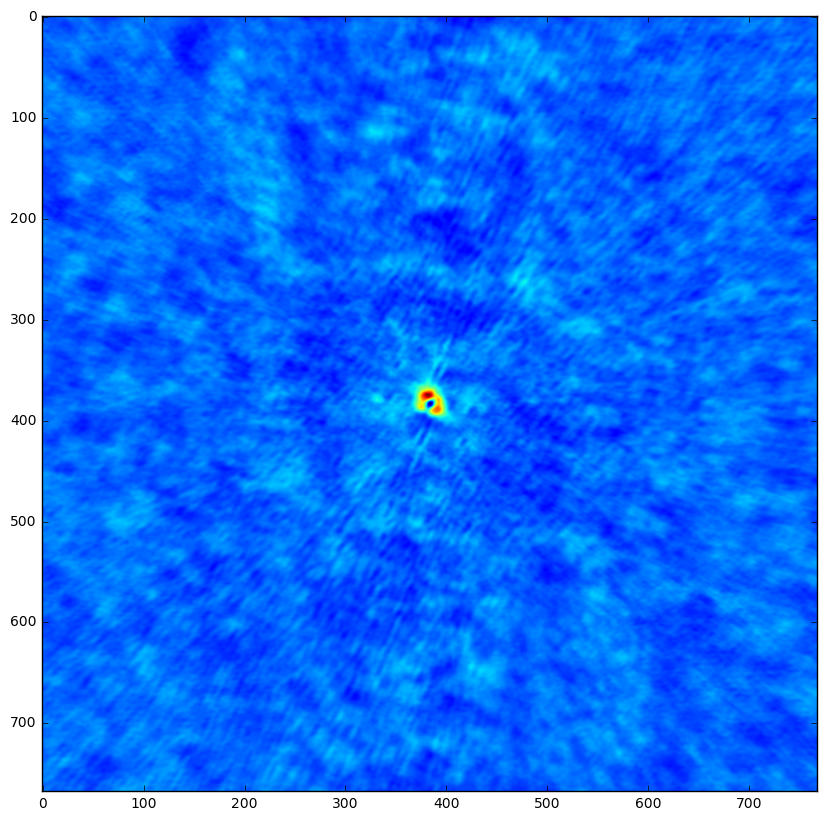

In [11]:
plt.figure(figsize=(10,10))
plt.imshow(img)

# I chose the tick marks based on the histogram above
# cbar = plt.colorbar(ticks=[3e-05,12e-05,3e-03])
# cbar.ax.set_yticklabels([3e-05,12e-05,3e-03])

In [12]:
from wavelet import wt
wt = wt()

In [13]:
result = wt.atrous(img, 6)

##WT--A Trous--Plane: 6
##WT--A Trous--Plane: 5
##WT--A Trous--Plane: 4
##WT--A Trous--Plane: 3
##WT--A Trous--Plane: 2
##WT--A Trous--Plane: 1
##WT--A Trous--Plane: 0


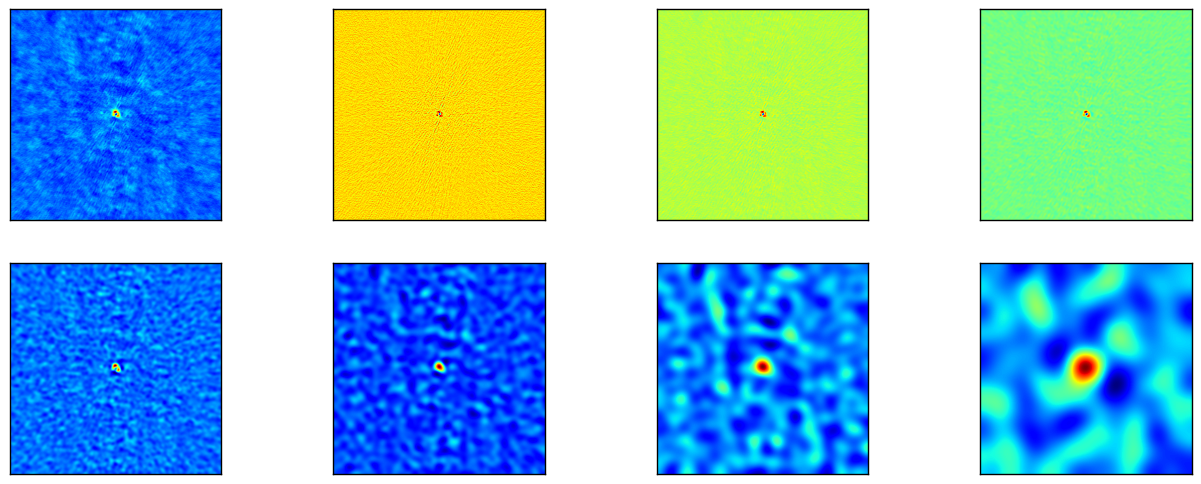

In [14]:
plt.figure(figsize=(16,6))

plt.subplot(241)
plt.imshow(img)
plt.xticks([]), plt.yticks([])
for i,lvl in enumerate(result):
    plt.subplot(24*10+i+2)
    plt.imshow(lvl)
    plt.xticks([]), plt.yticks([])

plt.show()

In [15]:
filteredplane = wt.filtering(result, threshold=3, mask=(0, 768, 0, 768))
#filteredplane = wt.filtering(result, waveletNoise=True, imageNoise = 3.5E-05)

#WT-- Image Filtering
#WT-- Filtering to be checked
##WT--Plane 6 Sigma = 2.228440e-06
##WT--Pixel filtered : 586446
##WT--Plane 5 Sigma = 5.425158e-06
##WT--Pixel filtered : 586924
##WT--Plane 4 Sigma = 7.530779e-06
##WT--Pixel filtered : 587943
##WT--Plane 3 Sigma = 8.327378e-06
##WT--Pixel filtered : 587865
##WT--Plane 2 Sigma = 7.987768e-06
##WT--Pixel filtered : 587388
##WT--Plane 1 Sigma = 5.804608e-06
##WT--Pixel filtered : 585779


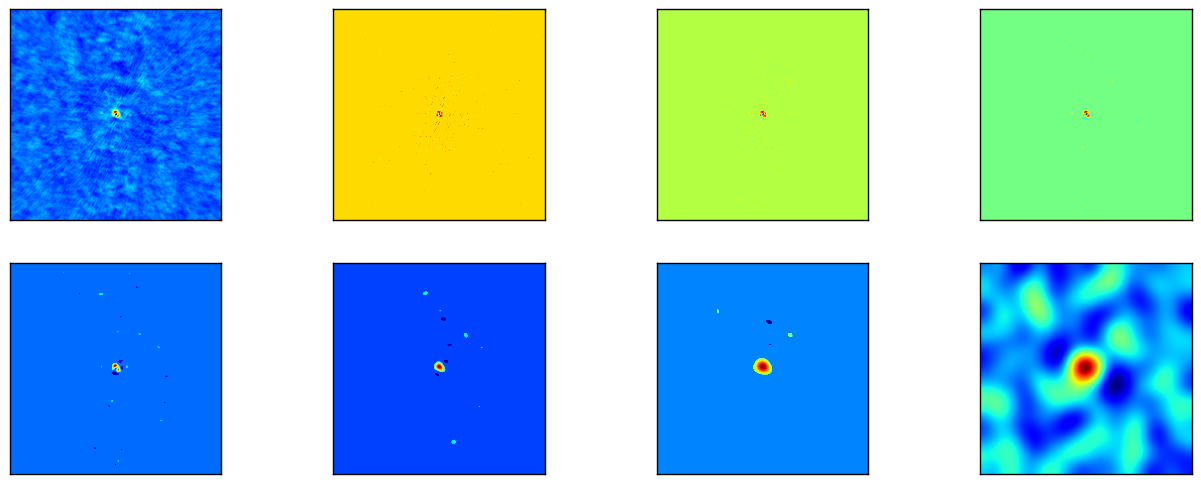

In [16]:
plt.figure(figsize=(16,6))

plt.subplot(241)
plt.imshow(img)
plt.xticks([]), plt.yticks([])
for i,lvl in enumerate(filteredplane):
    plt.subplot(24*10+i+2)
    plt.imshow(lvl)
    plt.xticks([]), plt.yticks([])

plt.show()

In [17]:
filtered = wt.restore(filteredplane, 0, 6)

##WT--Restore-plane: 0 to 6
##WT--Restore-plane: 0
##WT--Restore-plane: 1
##WT--Restore-plane: 2
##WT--Restore-plane: 3
##WT--Restore-plane: 4
##WT--Restore-plane: 5
##WT--Restore-plane: 6


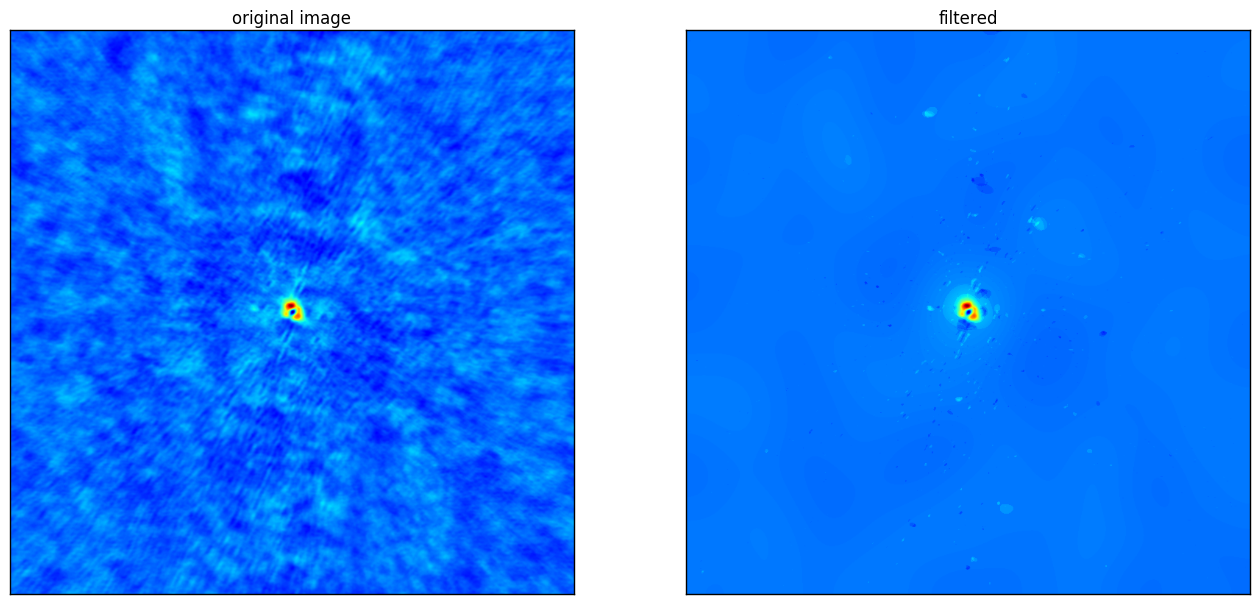

In [18]:
plt.figure(figsize=(16,12))

plt.subplot(121)
plt.imshow(img)
plt.title("original image")
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.title("filtered")
plt.imshow(filtered)
plt.xticks([]), plt.yticks([])

plt.show()

In [43]:
hdu_list[0].data[0][0] = filtered

In [44]:
hdu_list[0].data

array([[[[ -1.30126546e-06,  -1.30049170e-06,  -1.29894352e-06, ...,
            1.70072133e-06,   1.70139822e-06,   1.70173564e-06],
         [ -1.29912507e-06,  -1.29835405e-06,  -1.29681109e-06, ...,
            1.70178521e-06,   1.70246290e-06,   1.70280077e-06],
         [ -1.29484465e-06,  -1.29407886e-06,  -1.29254659e-06, ...,
            1.70390945e-06,   1.70458884e-06,   1.70492751e-06],
         ..., 
         [  2.25456347e-06,   2.25281656e-06,   2.24933092e-06, ...,
           -6.08551227e-06,  -6.08653227e-06,  -6.08703976e-06],
         [  2.25047529e-06,   2.24872770e-06,   2.24524047e-06, ...,
           -6.08426126e-06,  -6.08528489e-06,  -6.08579376e-06],
         [  2.24842915e-06,   2.24668111e-06,   2.24319319e-06, ...,
           -6.08363280e-06,  -6.08465780e-06,  -6.08516802e-06]]]], dtype=float32)

In [45]:
hdu_list.info()

Filename: ../compareImage/images/J0423-0120_B3.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU    1222   (768, 768, 1, 1)   float32   


In [46]:
hdu_list.writeto('J0423-0120_B3_filtered.fits')

INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Auto-setting vmin to -3.165e-05 [aplpy.core]
INFO: Auto-setting vmax to  7.465e-05 [aplpy.core]


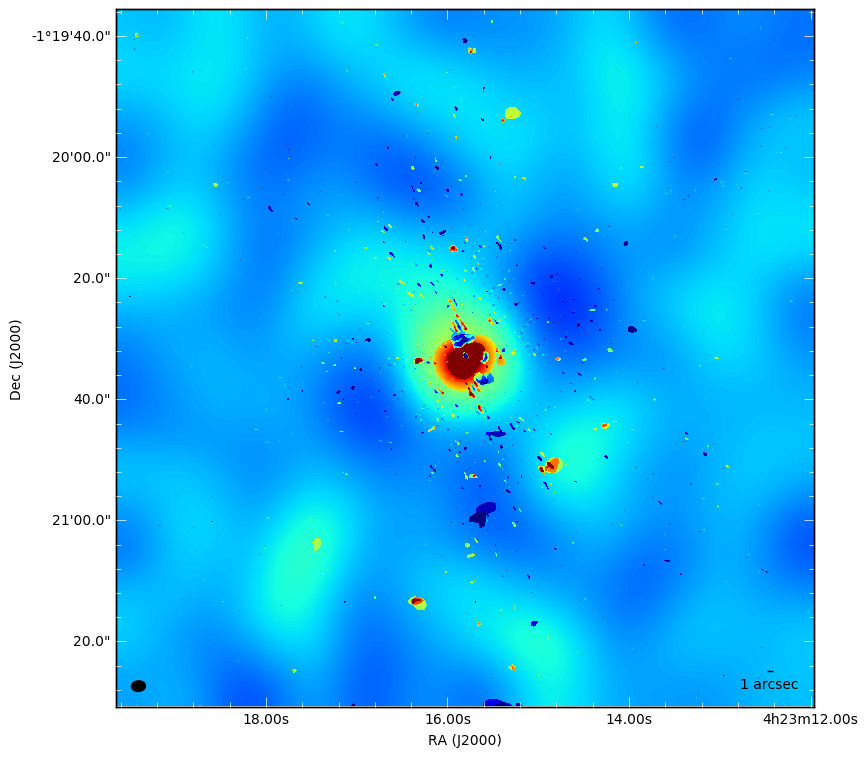

In [47]:
fig = aplpy.FITSFigure('J0423-0120_B3_filtered.fits')
fig.add_beam()
fig.beam.set_color('black')
fig.add_scalebar(1 * u.arcsecond)
fig.scalebar.set_label('1 arcsec')
fig.scalebar.set_color("black")
fig.show_colorscale()